# **import packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Read CSV File**
**encoding='cp1256' for read Arabic words**

In [ ]:
df = pd.read_csv("/content/Thanawya.csv" , encoding='cp1256')
df.head(5)

# **Get some information about dataset**

In [3]:
df.shape

(734990, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734990 entries, 0 to 734989
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 734989 non-null  float64
 1   Name               734990 non-null  object 
 2   Degree             734990 non-null  float64
 3   student_case       734990 non-null  int64  
 4   student_case_desc  734990 non-null  object 
 5   c_flage            734990 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 33.6+ MB


# **create a copy of dataset with Keeping students' names**

In [5]:
df_with_names = df.copy()
df_with_names.drop(columns=["student_case_desc", "c_flage"], inplace=True)
df_with_names.sample(5)

,ID,Name,Degree,student_case
286512,454221.0,حبيبه شحات رمضان محمود,315.5,1
670115,911301.0,نجاح على علام على,210.5,1
505132,725971.0,رحمه وليد محمد الموافى شعبان,357.5,1
618831,857612.0,سلمى محمد محمد بديوى,127.0,3
43511,146861.0,عمر احمد سيد احمد احمد خليف,269.0,1


#**Drop unwanted columns**

In [6]:
df.drop("student_case_desc" , axis=1 , inplace=True)
df.drop("Name" , axis=1 , inplace=True)
df.drop("c_flage" , axis=1 , inplace=True)
df.columns

Index(['ID', 'Degree', 'student_case'], dtype='object')

In [7]:
df.sample(5)

,ID,Degree,student_case
393879,591616.0,327.5,1
412653,610601.0,349.0,1
314816,496820.0,296.5,1
102318,225652.0,355.5,1
135111,259560.0,244.5,1


In [8]:
df["Degree"].sample(5)

245374    300.0
272777    283.0
647760    323.0
323494    289.5
400970    268.0
Name: Degree, dtype: float64

#**Create Percentage Column**

In [9]:
df["percentage"] = df["Degree"]/410
df["percentage"] = df["percentage"]*100
df["percentage"].sample(5)

471215    65.000000
675961    34.146341
707331    80.853659
87258     55.365854
561893    69.390244
Name: percentage, dtype: float64

In [10]:
df.sample(10)

,ID,Degree,student_case,percentage
164834,317360.0,297.5,1,72.560976
311435,480946.0,291.5,1,71.097561
623224,862005.0,312.5,1,76.219512
604538,840102.0,304.5,1,74.268293
47143,150641.0,176.5,3,43.048780
214359,367144.0,276.5,1,67.439024
522236,743075.0,275.0,1,67.073171
113860,237767.0,205.0,1,50.000000
271278,438955.0,396.0,1,96.585366
72363,176824.0,173.5,2,42.317073


#**cheak and drop any raw contain percentage grater than 100**

In [11]:
(df['percentage'].max() > 100)

True

In [12]:
df[df['percentage'] > 100]

,ID,Degree,student_case,percentage
0,100000.0,539.3,1,131.536585
1,100001.0,595.6,1,145.268293
2,100002.0,613.9,1,149.731707
3,100003.0,573.1,1,139.780488
4,100004.0,576.2,1,140.536585
...,...,...,...,...
1641,101657.0,502.1,1,122.463415
1642,101658.0,491.8,1,119.951220
1643,101659.0,648.0,1,158.048780
1644,101660.0,591.1,1,144.170732


In [13]:
df.drop(df[df['percentage'] > 100].index , inplace=True)
(df['percentage'].max() > 100)

False

#**Create copy of daatset without ID Column**

In [14]:
new_df = df.drop("ID" , axis=1)
new_df.sample(5)

,Degree,student_case,percentage
384252,366.0,1,89.268293
504449,354.0,1,86.341463
283762,292.5,1,71.341463
307056,328.5,1,80.121951
291552,304.0,1,74.146341


#**Create percentage Column for dataset copy with name and show the first 10 students**

In [15]:
print(df_with_names.columns)

Index(['ID', 'Name', 'Degree', 'student_case'], dtype='object')


In [18]:
df_with_names["percentage"] = df_with_names["Degree"]/410
df_with_names["percentage"] = df_with_names["percentage"]*100
df_with_names.drop(df_with_names[df_with_names['percentage'] > 100].index , inplace=True)
top_10 = df_with_names.nlargest(10, 'percentage')[['Name', 'percentage']]
top_10

,Name,percentage
678213,عمر ضياء فاوى احمد,99.512195
161065,حبيبه احمد عبدالسميع احمد,99.268293
241615,محمد هاني سعيد محمد محمود,98.902439
107783,نورهان نبيل عبد العظيم صالح,98.780488
164187,عبدالعزيز عصام الدين عبدالعزيز ابراهيم,98.780488
290551,محمد شريف محمد الامير هريدى قاسم,98.780488
420944,محمد احمد محمد احمد الحسينى داود,98.780488
206482,ندى رمضان عبدالونيس محمد الدمهوجي,98.658537
652327,احمد فتحى عبد القوى عبد ربه,98.658537
160438,امل محمد وجدى عبدالحميد المنصورى,98.536585


#**install packages to correct Arabic names in matplptlip**

In [30]:
!! pip install arabic-reshaper
!! pip install python-bidi

['Collecting python-bidi',
 '  Downloading python_bidi-0.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.6 kB)',
 'Downloading python_bidi-0.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (281 kB)',
 '\x1b[?25l   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/281.3 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━\x1b \x1b153.6/281.3 kB\x1b \x1b4.6 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b281.3/281.3 kB\x1b \x1b4.7 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hInstalling collected packages: python-bidi',
 'Successfully installed python-bidi-0.6.0']

#**Define a function to correct Names , but it's faild**
**any one know the solution of this problem , contact me**

In [28]:
import arabic_reshaper
def reshape_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return reshaped_text

#**bar plot to show the best 10 Students**

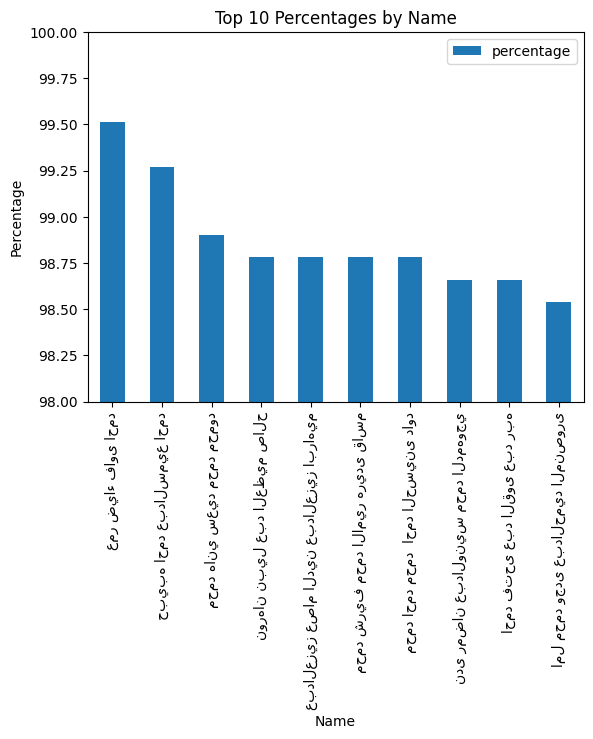

In [29]:
top_10.plot(kind = "bar" , x='Name', y='percentage' )
plt.ylim(98, 100)
plt.xlabel(reshape_arabic_text('Name'))
plt.ylabel('Percentage')
plt.title('Top 10 Percentages by Name')
plt.show()

#**Show mean and Percentages mean**

In [19]:
Degree_mean = new_df["Degree"].mean()
Degree_mean

275.21700433620595

In [20]:
percentage_mean = new_df["percentage"].mean()
percentage_mean

67.12609861858684

#**plot the Distribution of Percentages**

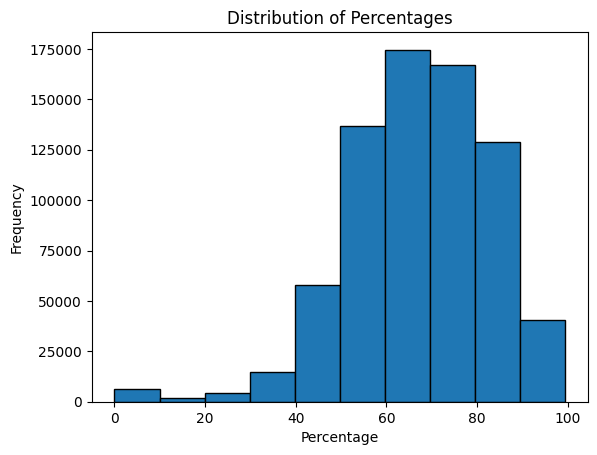

In [32]:
plt.hist(new_df["percentage"], bins=10, edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Percentages')
plt.show()

#**correct some data about Student case**

In [36]:
student_case_counts = new_df['student_case'].value_counts()
student_case_counts

student_case
1     594060
2      97474
3      38626
12      3200
Name: count, dtype: int64

In [39]:
new_df.loc[(new_df['student_case'] == 12) & (new_df['percentage'] > 50), 'student_case'] = 1
new_df.loc[(new_df['student_case'] == 12) & (new_df['percentage'] <= 50), 'student_case'] = 2
new_df['student_case'].value_counts()

student_case
1    594060
2    100674
3     38626
Name: count, dtype: int64

#**plot Distribution of Student Cases**

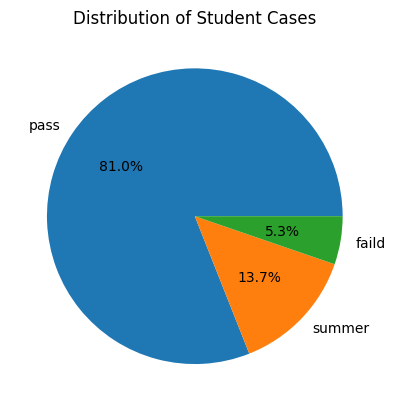

In [44]:
student_case_pie = new_df['student_case'].value_counts()
plt.pie(student_case_pie.values, labels=['pass' , 'summer' , 'faild'], autopct='%1.1f%%')
plt.title('Distribution of Student Cases')
plt.show()

#**plot Distribution of Passing Students by Percentage**

<ipython-input-46-f81addf1716a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passing_students['percentage_group'] = pd.cut(passing_students['percentage'], bins=bins, labels=labels, include_lowest=True)


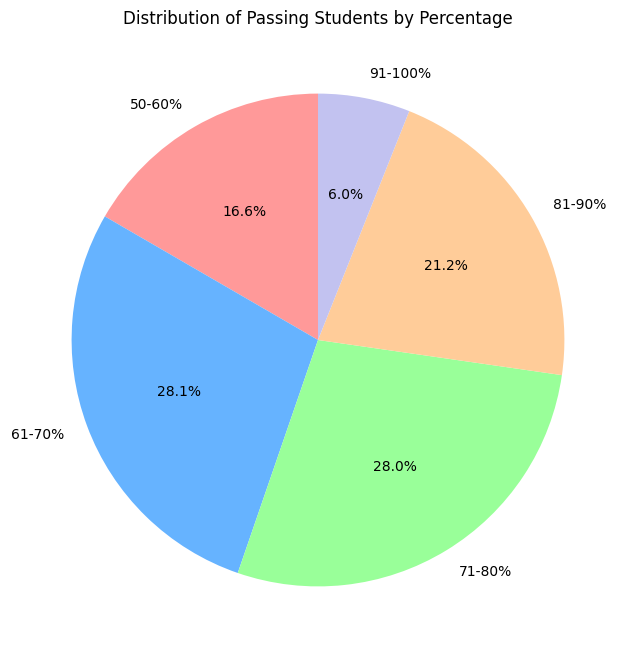

In [46]:
passing_students = new_df[new_df['student_case'] == 1]
bins = [50, 60, 70, 80, 90, 100]
labels = ['50-60%', '61-70%', '71-80%', '81-90%', '91-100%']

passing_students['percentage_group'] = pd.cut(passing_students['percentage'], bins=bins, labels=labels, include_lowest=True)
percentage_counts = passing_students['percentage_group'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
percentage_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Distribution of Passing Students by Percentage')
plt.ylabel('')
plt.show()

#**plot box plot to show most of Percentage confined between 60 and 80**

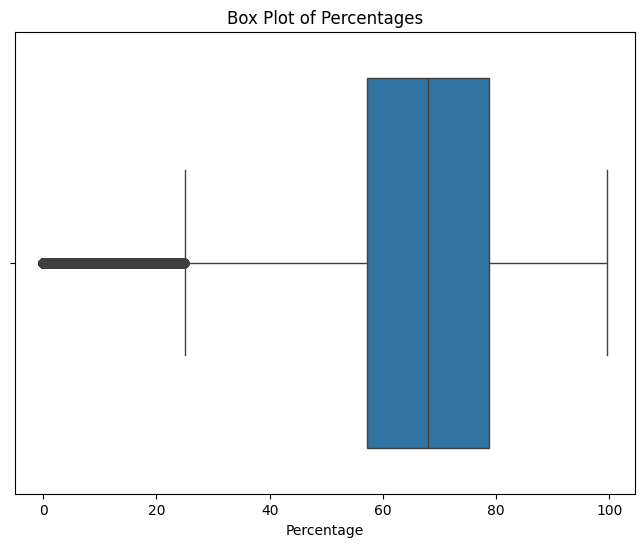

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df['percentage'])
plt.xlabel('Percentage')
plt.title('Box Plot of Percentages')
plt.show()

#***Thank you***